In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

Challenge

Now that you have two new regression methods at your fingertips, it's time to give them a spin. In fact, for this challenge, let's put them together! Pick a dataset of your choice with a binary outcome and the potential for at least 15 features. If you're drawing a blank, the crime rates in 2013 dataset has a lot of variables that could be made into a modelable binary outcome.

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

Vanilla logistic regression
Ridge logistic regression
Lasso logistic regression
If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

Record your work and reflections in a notebook to discuss with your mentor.

In [41]:
# Use the credit card fraud detection dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
# Remove time column
df.drop('Time', inplace=True, axis=1)

In [52]:
col_names = df.columns
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
df.shape

(284807, 30)

In [45]:
pd.isna(df).any().any()

False

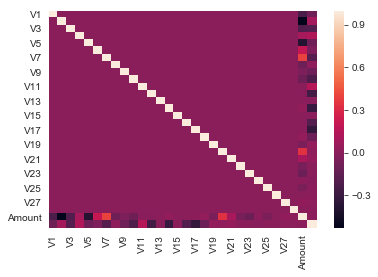

In [60]:
sns.heatmap(df.corr())

In [76]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:29]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### Vanilla logistic regression 

In [130]:
import statsmodels.api as sm
X_statsmod = X_train.copy()

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.

logit = sm.Logit(y_train, X_statsmod)
result = logit.fit()

# Lots of information about the model # Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(df['admit'], pred_y_statsmod)

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.004235
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199334
Method:                           MLE   Df Model:                           29
Date:                Thu, 01 Aug 2019   Pseudo R-squ.:                  0.6747
Time:                        15:52:11   Log-Likelihood:                -844.35
converged:                       True   LL-Null:                       -2595.8
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1             0.1046      0.048      2.160      0.031       0.010       0.199
V2             0.0151      0

In [140]:
pred_statsmod = result.predict(X_statsmod)

pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(y_train, pred_y_statsmod)

print('\n Accuracy')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by admission status
col_0       0    1
Class             
0      198978   32
1         136  218

 Percentage accuracy
0.9991573202784856


### Ridge logistic regression 

In [102]:
ridgeregr = linear_model.Ridge(alpha=1000, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', ridgeregr.coef_)
print('\nIntercept: \n', ridgeregr.intercept_)
print('\nR-squared - train data:')
print(ridgeregr.score(X_test, y_test))



Coefficients: 
 [-1.66764807e-03  3.41894863e-03 -4.67260616e-03  3.61892634e-03
 -1.66112340e-03 -1.98547642e-03 -7.43793095e-03  9.36067574e-04
 -3.49753109e-03 -7.80731803e-03  6.21006554e-03 -1.05867672e-02
 -2.25863601e-04 -1.30306821e-02 -1.51809931e-04 -9.21448132e-03
 -1.57044413e-02 -5.59000147e-03  2.10205875e-03 -5.96048816e-04
  1.69224725e-03  4.82502399e-04  3.74843266e-04 -4.56021087e-04
  5.67336615e-04  4.27787870e-04  1.47284878e-03  9.12567143e-04
  1.50998435e-05]

Intercept: 
 0.0

R-squared - train data:
0.5601476917132866


In [103]:
cross_val_score(ridgeregr, X_test, y_test, cv=10)

array([0.59691624, 0.4483721 , 0.50141147, 0.46872729, 0.5806551 ,
       0.62962505, 0.67542277, 0.6382177 , 0.41056282, 0.55683693])

### Lasso logistic regression

In [104]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', lassfit.coef_)
print('\nIntercept: \n', lassfit.intercept_)
print('\nR-squared - train data:')
print(lassfit.score(X_test, y_test))


Coefficients: 
 [-0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0.
  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0.]

Intercept: 
 0.0017756465560482334

R-squared - train data:
-1.5982230561650823e-05


In [105]:
cross_val_score(lassfit, X_test, y_test, cv=10)

array([-8.71404503e-05, -3.70435848e-04, -1.46649207e-03, -1.41935993e-04,
       -7.11577221e-06, -4.42819166e-04, -1.03082016e-04, -4.38107874e-05,
       -4.15524155e-07, -3.90472692e-05])

### Try gridsearch to improve input parameters

In [106]:
from sklearn.model_selection import GridSearchCV

# Ridge Regression

lr = LogisticRegression()

parameters = {'penalty':['l2'],
             'C':[0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

grid = GridSearchCV(lr, parameters, cv=5, verbose=0)
grid.fit(X_train, y_train)

C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000, 100000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [108]:
grid.best_score_

0.9991071607712526

In [137]:
lr = LogisticRegression(penalty='l2',C=.01)
lr.fit(X_train,y_train)
print(lr.score(X_test, y_test))

C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9991924440855307


In [138]:
cross_val_score(lr, X_test, y_test, cv=5)

C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

array([0.99912224, 0.99929779, 0.99918076, 0.99935627, 0.99923923])

In [117]:
# Lasso Regression

lr = LogisticRegression(penalty='l1')

parameters = {'C':[0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

grid = GridSearchCV(lr, parameters, cv=5, verbose=0)

grid.fit(X_train, y_train)

C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000, 100000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [118]:
grid.best_params_

{'C': 100}

In [119]:
grid.best_score_

0.9991021448205293

In [135]:
lr = LogisticRegression(penalty='l1',C=100)
lr.fit(X_train,y_train)
print(lr.score(X_test, y_test))

C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9992158515033414


In [136]:
cross_val_score(lr, X_test, y_test, cv=5)

C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia2\Anaconda3-2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

array([0.99923928, 0.99912224, 0.99953186, 0.99935627, 0.99912219])

All three models performed well for this dataset once the parameters were optimized.